In [269]:
import pandas as pd
import numpy as np
#libraries required to read the data file inside a zip file
import zipfile
from io import StringIO, BytesIO, TextIOWrapper
import urllib.request
#libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reading the data programmatically from the UCI repository

In [252]:
# The following code is used to read the data file inside the zip file on the UCI repository
uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/'

student_data_uci_url = 'student.zip'

resp = urllib.request.urlopen(uci_url +  urllib.request.quote(student_data_uci_url))

zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('student-mat.csv'), encoding='utf-8')

# Separator in the file is ; so it is specified explicitly as the default separator is , and if the separator is not specified
# all the values get displayed as a single entity in the last column
df = pd.read_csv(data, sep=';')    

# Step 2: Analyzing the data for basic structure and completeness

In [137]:
#Displaying the first 5 rows to see what kind of data exists
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# We start with getting information about the columns and rows of the dataset
## The info function reveals the following:
    1) Number of rows = 395
    2) Number of columns = 33
    3) Number of int64 columns = 16
    4) Number of object columns = 17
    5) All columns are non-null so that means the data cannot have any null values. However 0 may be present as a value so 
    we need to check the validity of the 0's. Also we need to confirm validity of the data based on the description of the attributes provided at the UCI repository.
    6) A description of the attributes of the dataset on the UCI repository site reveals that all variables are categorical 
    in nature.
    
# Attributes for the dataset (from the UCI repository):
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

# Analysis of the attribute information reveals the following:
1. Continuous variables: age, absences
2. All other variables are categorical variables
    - Nominal: school, sex, address, famsize, Pstatus,  Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, 
    - Ordinal: Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health
 
<div class="alert-danger">
# Question 1: Is grade a continuous/categorical variable? It is a number between 0-20
</div>

In [124]:
#Getting the statisctical information using the describe function
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Analysis of the describe function reveals the following about the dataset:
1) Majority of the class (more than 75%) have: 
   - An age less than 18 years.
   - Parents have a secondary or higher education 
   - Distance from school is less than 30 minutes
   - A weekly study time of 2-5 hours
   - Had zero previous failures
   - Family relations less than excellent but the mean family relations is good.
   - Freetime is less than high with an average freetime of 3 which implies a good amount.
   - Going out with friends is less than high but an average is good.
   - Daily alcohol consumption is less than low 
   - Weekly alcohol consumption is greater than daily alcohol consumption but still less than moderate.
   - Health status is less than excellent but the mean is moderate.
   - Number of absences are less than 8
   - Grades G1, G2 and G3 are less than 19/20 with a mean of approximately 10

In [129]:
#Checking for duplicate rows
duplicate = df[df.duplicated()]
duplicate

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


# Since there are no nulls in the data and no duplicate rows, let's now proceed to plot some graphs.
## However, we need to be wary of the 0 values in the data which might not be valid. 
## Also each column needs to be checked for valid values. 

<div class="alert-danger">
Write code to check whether each of the value is within the range specified.
</div>

# Step 3: Visualizations
## Plotting box plots to determine outliers, if any

<AxesSubplot:>

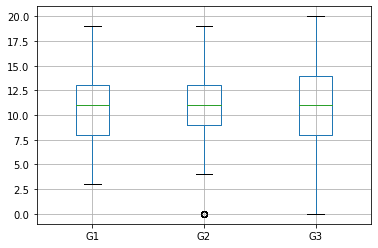

In [143]:
df.boxplot(column =['G1', 'G2', 'G3'])

<AxesSubplot:>

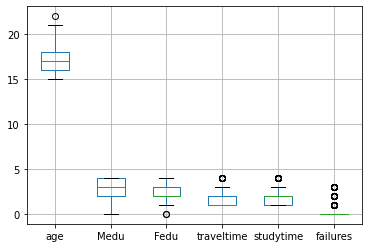

In [149]:
df.boxplot(column =['age', 'Medu', 'Fedu', 'traveltime', 'studytime','failures'])

<AxesSubplot:>

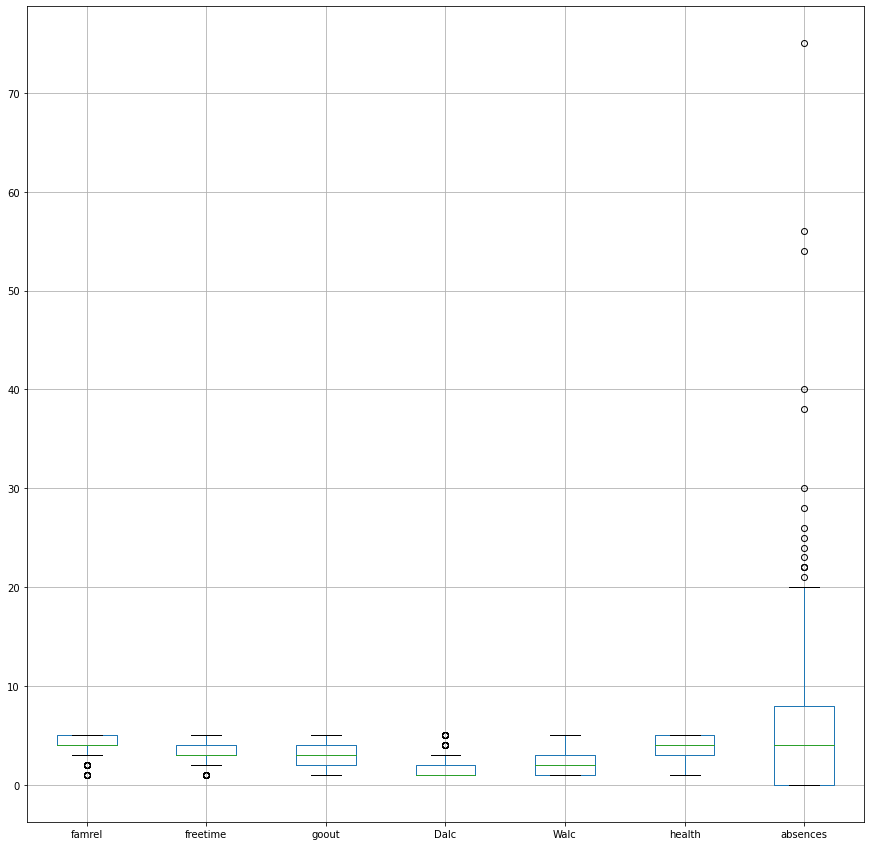

In [160]:
df.boxplot(column = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'], figsize=(15,15))   


<AxesSubplot:title={'center':'Family relations'}, ylabel='Frequency'>

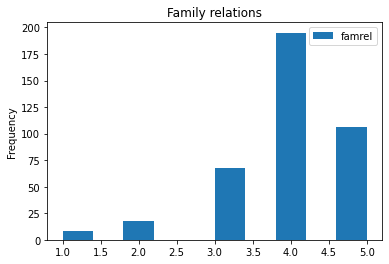

In [234]:
df[['famrel']].plot.hist(bins = 10, title = 'Family relations')

<AxesSubplot:title={'center':'Final Grade Distribution'}, ylabel='Frequency'>

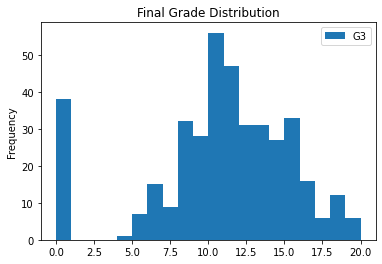

In [231]:
df[['G3']].plot.hist(bins = 20, title = 'Final Grade Distribution')

<div class="alert-danger">
About 40 students have a grade G3 of 0 - validity of data needs to be checked.
</div>

In [173]:
corr = df[['G1','G2','G3','absences', 'famrel','Fedu','Medu','age', 'traveltime', 'studytime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,G1,G2,G3,absences,famrel,Fedu,Medu,age,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health
G1,1.00,0.85,0.80,-0.03,0.02,0.19,0.21,-0.06,-0.09,0.16,-0.35,0.01,-0.15,-0.09,-0.13,-0.07
G2,0.85,1.00,0.90,-0.03,-0.02,0.16,0.22,-0.14,-0.15,0.14,-0.36,-0.01,-0.16,-0.06,-0.08,-0.10
G3,0.80,0.90,1.00,0.03,0.05,0.15,0.22,-0.16,-0.12,0.10,-0.36,0.01,-0.13,-0.05,-0.05,-0.06
absences,-0.03,-0.03,0.03,1.00,-0.04,0.02,0.10,0.18,-0.01,-0.06,0.06,-0.06,0.04,0.11,0.14,-0.03
famrel,0.02,-0.02,0.05,-0.04,1.00,-0.00,-0.00,0.05,-0.02,0.04,-0.04,0.15,0.06,-0.08,-0.11,0.09
Fedu,0.19,0.16,0.15,0.02,-0.00,1.00,0.62,-0.16,-0.16,-0.01,-0.25,-0.01,0.04,0.00,-0.01,0.01
Medu,0.21,0.22,0.22,0.10,-0.00,0.62,1.00,-0.16,-0.17,0.06,-0.24,0.03,0.06,0.02,-0.05,-0.05
age,-0.06,-0.14,-0.16,0.18,0.05,-0.16,-0.16,1.00,0.07,-0.00,0.24,0.02,0.13,0.13,0.12,-0.06
traveltime,-0.09,-0.15,-0.12,-0.01,-0.02,-0.16,-0.17,0.07,1.00,-0.10,0.09,-0.02,0.03,0.14,0.13,0.01
studytime,0.16,0.14,0.10,-0.06,0.04,-0.01,0.06,-0.00,-0.10,1.00,-0.17,-0.14,-0.06,-0.20,-0.25,-0.08


## From the above we can find that there is a strong linear relation between grades G1, G2 and G3. 
## Also there is a positive linear relation between mothers and fathers education and between the daily and weekly alcohol consumption which is obvious.

# Since the grades is the most important variable - a relation of other variables to the grades is being analyzed.
## Grades have a positive linear relation with:
 - Mothers education
 - Fathers education
 - Study time
## Grades have a negative linear relation with:
 - Age (which is surprising as higher age should have better grades but it is the opposite)
 - Traveltime (As traveltime increases tiredness increases and grade reduces)
 - Going out (as going out increases grade reduces)



Text(0, 0.5, 'Grade 3 - Final Grade')

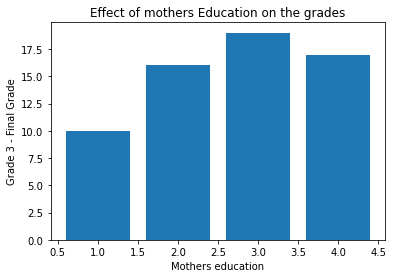

In [226]:
# Bar Plot
fig, ax = plt.subplots()
Medu = df['Medu'].head(33)
G3 = df['G3'].head(33)
plt.bar(Medu, G3)
ax.set_title('Effect of mothers Education on the grades')
ax.set_xlabel('Mothers education' )
ax.set_ylabel('Grade 3 - Final Grade' )

Text(0, 0.5, 'Age')

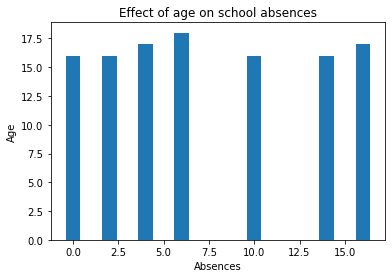

In [228]:
fig, ax = plt.subplots()
absences = df['absences'].head(33)
age = df['age'].head(33)
plt.bar(absences, age)
ax.set_title('Effect of age on school absences')
ax.set_xlabel('Absences' )
ax.set_ylabel('Age' )

<BarContainer object of 33 artists>

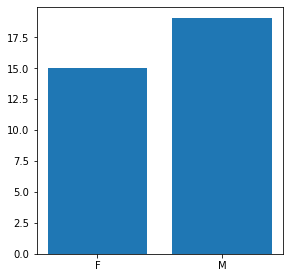

In [287]:
fig = plt.figure(figsize = (15,10))
sex = df['sex'].head(33)
grade = df['G3'].head(33)

ax1 = fig.add_subplot(2,3,1)
#sns.countplot(data = df, x = 'sex', ax=ax1)
plt.bar(sex, grade)
#ax2 = fig.add_subplot(2,3,2)
#sns.countplot(data = ds_cat, x = 'LotShape', ax=ax2)

<AxesSubplot:title={'center':'Age vs Absences'}, xlabel='age', ylabel='absences'>

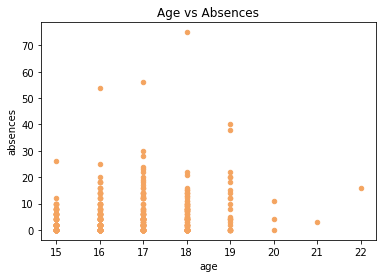

In [235]:
df.plot.scatter(x = 'age', y = 'absences',
                  color = 'sandybrown', title = 'Age vs Absences')

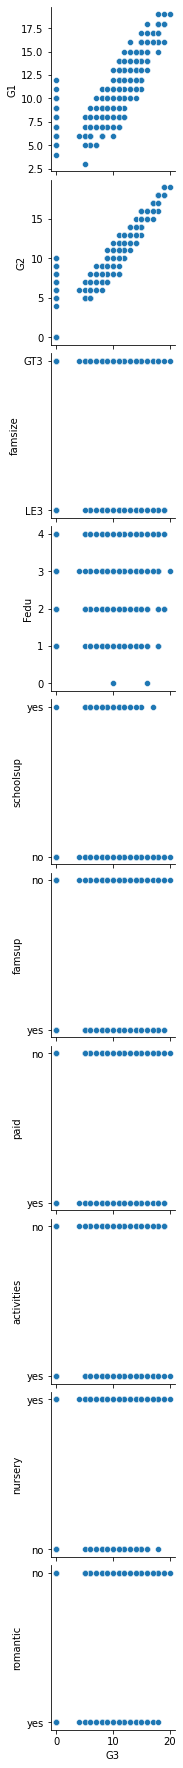

In [293]:
test = sns.pairplot(data=df,
                  x_vars=['G3'],
                  y_vars=['G1', 'G2', 'famsize', 'Fedu','schoolsup','famsup','paid','activities','nursery','romantic'])

<div class="alert-danger">
Question: How do you find a reation between non numeric variables?
</div>